1. Load all the required modules and define basic functions. The logic of the functions are commented inline.

In [1]:
# This file follows PEP 257 – Docstring Conventions.
# This file works best with Visual Studio Code, Pylance and type checking enabled.
# Put your mouse hovering on the variables and their comments show intuitively.

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Imports for typing hints only
import numpy.typing as npt
from matplotlib.axes import Axes

# Constants required in this file
UINT8_MAX: int = 255            # the maximum value of 8-bit unsigned int
PIL_MODE_GRAY: str = 'L'        # 8-bit pixels, grayscale
PIL_MODE_RGB: str = 'RGB'       # 8-bit pixels * 3, true color
PIL_MODE_HSV: str = 'HSV'       # 8-bit pixels * 3, Hue, Saturation, Value color space
PIL_MODE_YCBCR: str = 'YCbCr'   # 8-bit pixels * 3, color video format


def histogram_equalization_grayscale(image_before: npt.NDArray[np.uint8]) -> npt.NDArray[np.uint8]:
    '''
    ## `histogram_equalization_grayscale`
    This function tries to enhance the contrast of a grayscale image.
    ## Parameters
    - `image_before`: input image for enhancement
    ## Returns
    - `image_after`: output image after enhancement
    '''
    histogram_tuple: tuple[npt.NDArray[np.float64], npt.NDArray[np.float64]] = np.histogram(
        a=image_before,
        bins=UINT8_MAX + 1,
        range=(0.0, UINT8_MAX + 1.0),
    )                                                                        # calculate the histogram of the image
    histogram: npt.NDArray[np.float64] = histogram_tuple[0]                  # get the values of the histogram
    cdf_before: npt.NDArray[np.float64] = histogram.cumsum()                 # sum up the values to get the cumulative density function (CDF)
    cdf_before_max: float = cdf_before.max()                                 # get the maximum value of the CDF
    cdf_before_min: float = cdf_before.min()                                 # get the minimum value of the CDF
    cdf_range: float = cdf_before_max - cdf_before_min                       # get the range of the CDF
    cdf_after: npt.NDArray[np.float64] = (cdf_before - cdf_before_min) * UINT8_MAX / cdf_range    # normalize the CDF
    cdf_after_uint8: npt.NDArray[np.uint8] = cdf_after.astype(np.uint8)      # store the values of the CDF as 8-bit unsigned integer
    image_after: npt.NDArray[np.uint8] = cdf_after_uint8[image_before]       # use the CDF to map the values of the image
    return image_after


def show_image_gray(axis: Axes, image: npt.NDArray[np.uint8], title: str) -> None:
    '''
    ## `show_image_gray`
    This function shows the image with the title for the given `Axes`.
    ## Parameters
    - `axis`: `~matplotlib.axes.Axes`, usually a specific subplot slot
    - `image`: the image to be shown
    - `title`: the title given to the image
    ## Returns
    - None
    '''
    axis.imshow(image, cmap='gray')
    axis.set_title(title)


def show_hist(axis: Axes, image: npt.NDArray[np.uint8], title: str) -> None:
    '''
    ## `show_hist`
    This function shows the histogram of an image, given an image, an `Axes` and a title.
    ## Parameters
    - `axis`: `~matplotlib.axes.Axes`, usually a specific subplot slot
    - `image`: the input image to generate the histogram
    - `title`: the title given to the histogram
    ## Returns
    - None
    '''
    axis.hist(image.ravel(), UINT8_MAX)
    axis.set_xlim(0, UINT8_MAX)
    axis.set_title(title)

def color_space_convert(src: npt.NDArray[np.uint8], mode_before: str, mode_after: str) -> npt.NDArray[np.uint8]:
    '''
    ## `color_space_convert`
    This function converts the color space an image stored in a numpy array, given corresponding PIL modes.
    ## Parameters
    - `src`: the image to be converted
    - `mode_before`: the color space of `src`, e.g. `'RGB'`, `'HSV'`
    - `mode_after`: the desired color space after conversion, e.g. `'RGB'`, `'HSV'`
    ## Returns
    - `dst`: the converted image
    '''
    dst: npt.NDArray[np.uint8] = np.asarray(Image.fromarray(src, mode_before).convert(mode_after))
    return dst


2. Read all the filenames of images given in the sample directory. **NOTE: Different for everyone! Change the const strings before running this code!**

In [2]:
from google.colab import drive
drive.mount('/content/drive')
SAMPLES_DIR: str = 'drive/MyDrive/NTU-AI6121-Assignment-1'
filenames: list[str] = os.listdir(SAMPLES_DIR)
images: list[str] = [f for f in filenames if '.jpg' in f]
print('Possible images: ', images)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Possible images:  ['sample06.jpg', 'sample05.jpg', 'sample08.jpg', 'sample07.jpg', 'sample01.jpg', 'sample02.jpg', 'sample03.jpg', 'sample04.jpg']


3. For each image, treat it as a grayscale image and run the process.

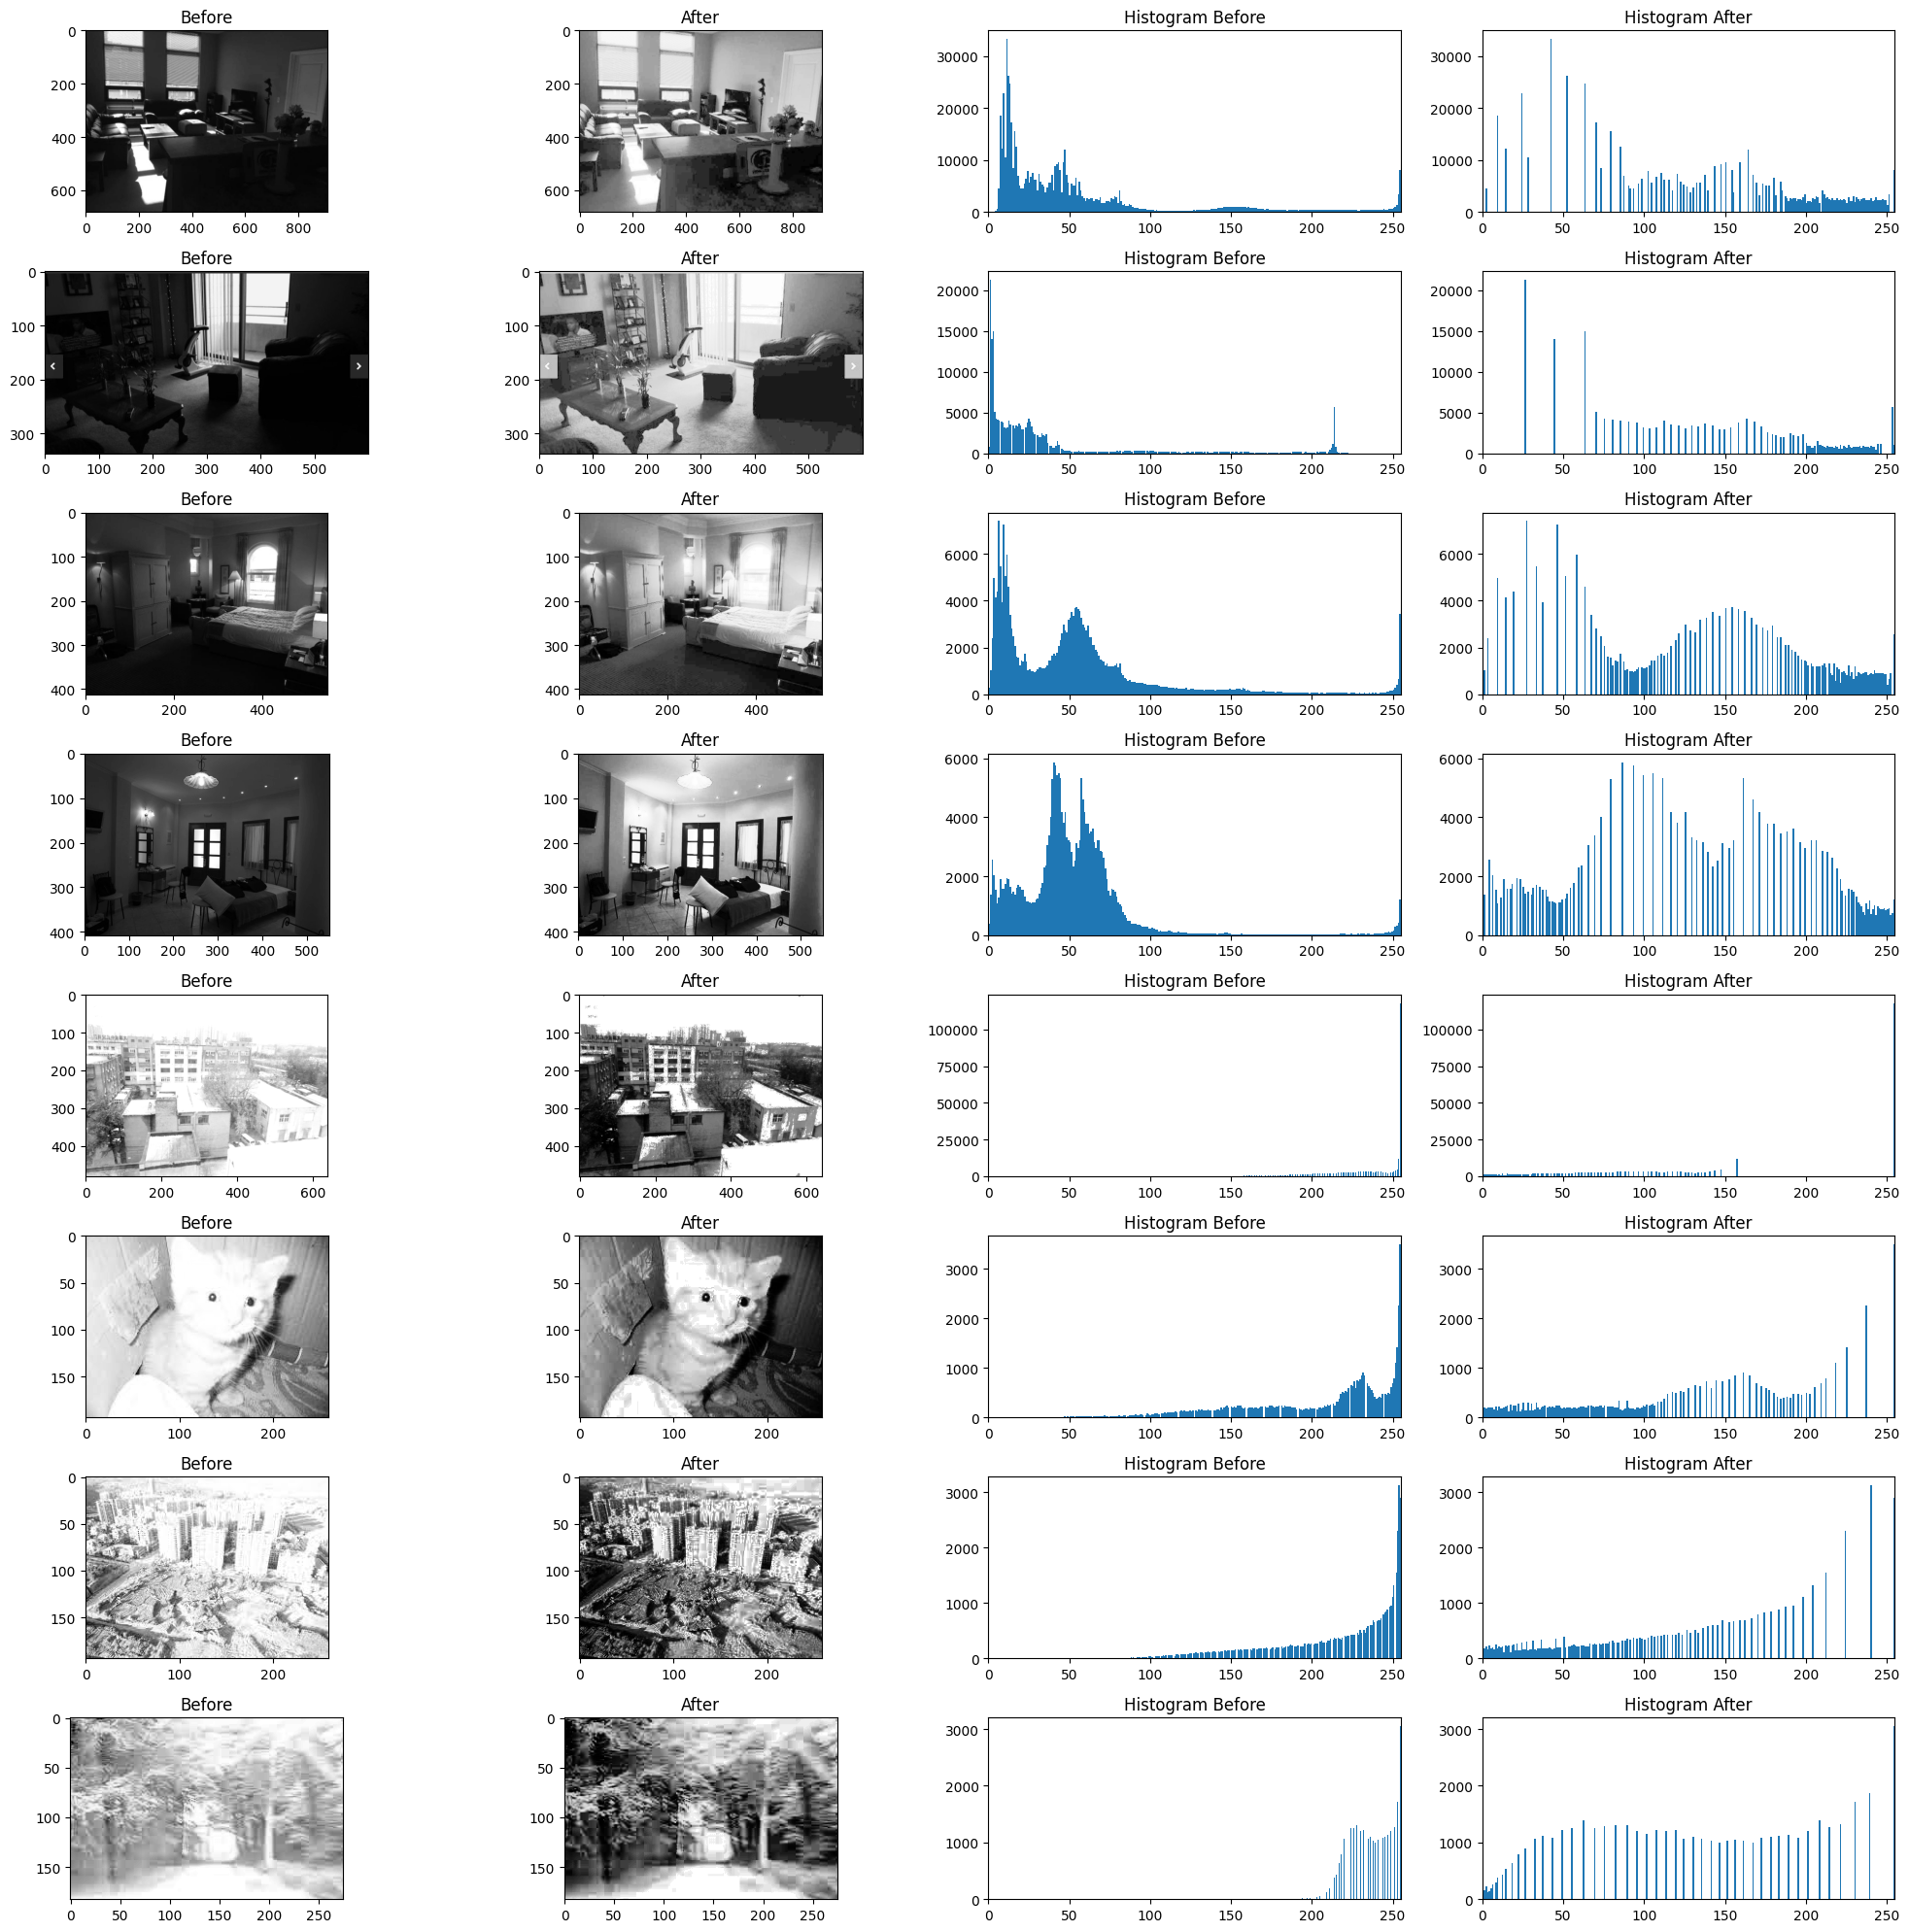

In [3]:
len_images: int = len(images)
_, axes = plt.subplots(len_images, 4, figsize=(20, 20))
for i in range(len_images):
    image_path: str = os.path.join(SAMPLES_DIR, images[i])
    image: Image.Image = Image.open(image_path)                                         # read the image from the given path
    image_grayscale: Image.Image = image.convert(PIL_MODE_GRAY)                         # convert the image from RGB to grayscale
    image_before: npt.NDArray[np.uint8] = np.asarray(image_grayscale)                   # convert the data type to numpy array
    image_after: npt.NDArray[np.uint8] = histogram_equalization_grayscale(image_before) # get the HE-ed image
    show_image_gray(axes[i, 0], image_before, 'Before')
    show_image_gray(axes[i, 1], image_after, 'After')
    show_hist(axes[i, 2], image_before, 'Histogram Before')
    show_hist(axes[i, 3], image_after, 'Histogram After')
plt.tight_layout()
plt.show()

4. For each image, convert the color space of it from `RGB` to `HSV`, and treat channel `V` as a grayscale image, run the process and reassemble the enhanced image.

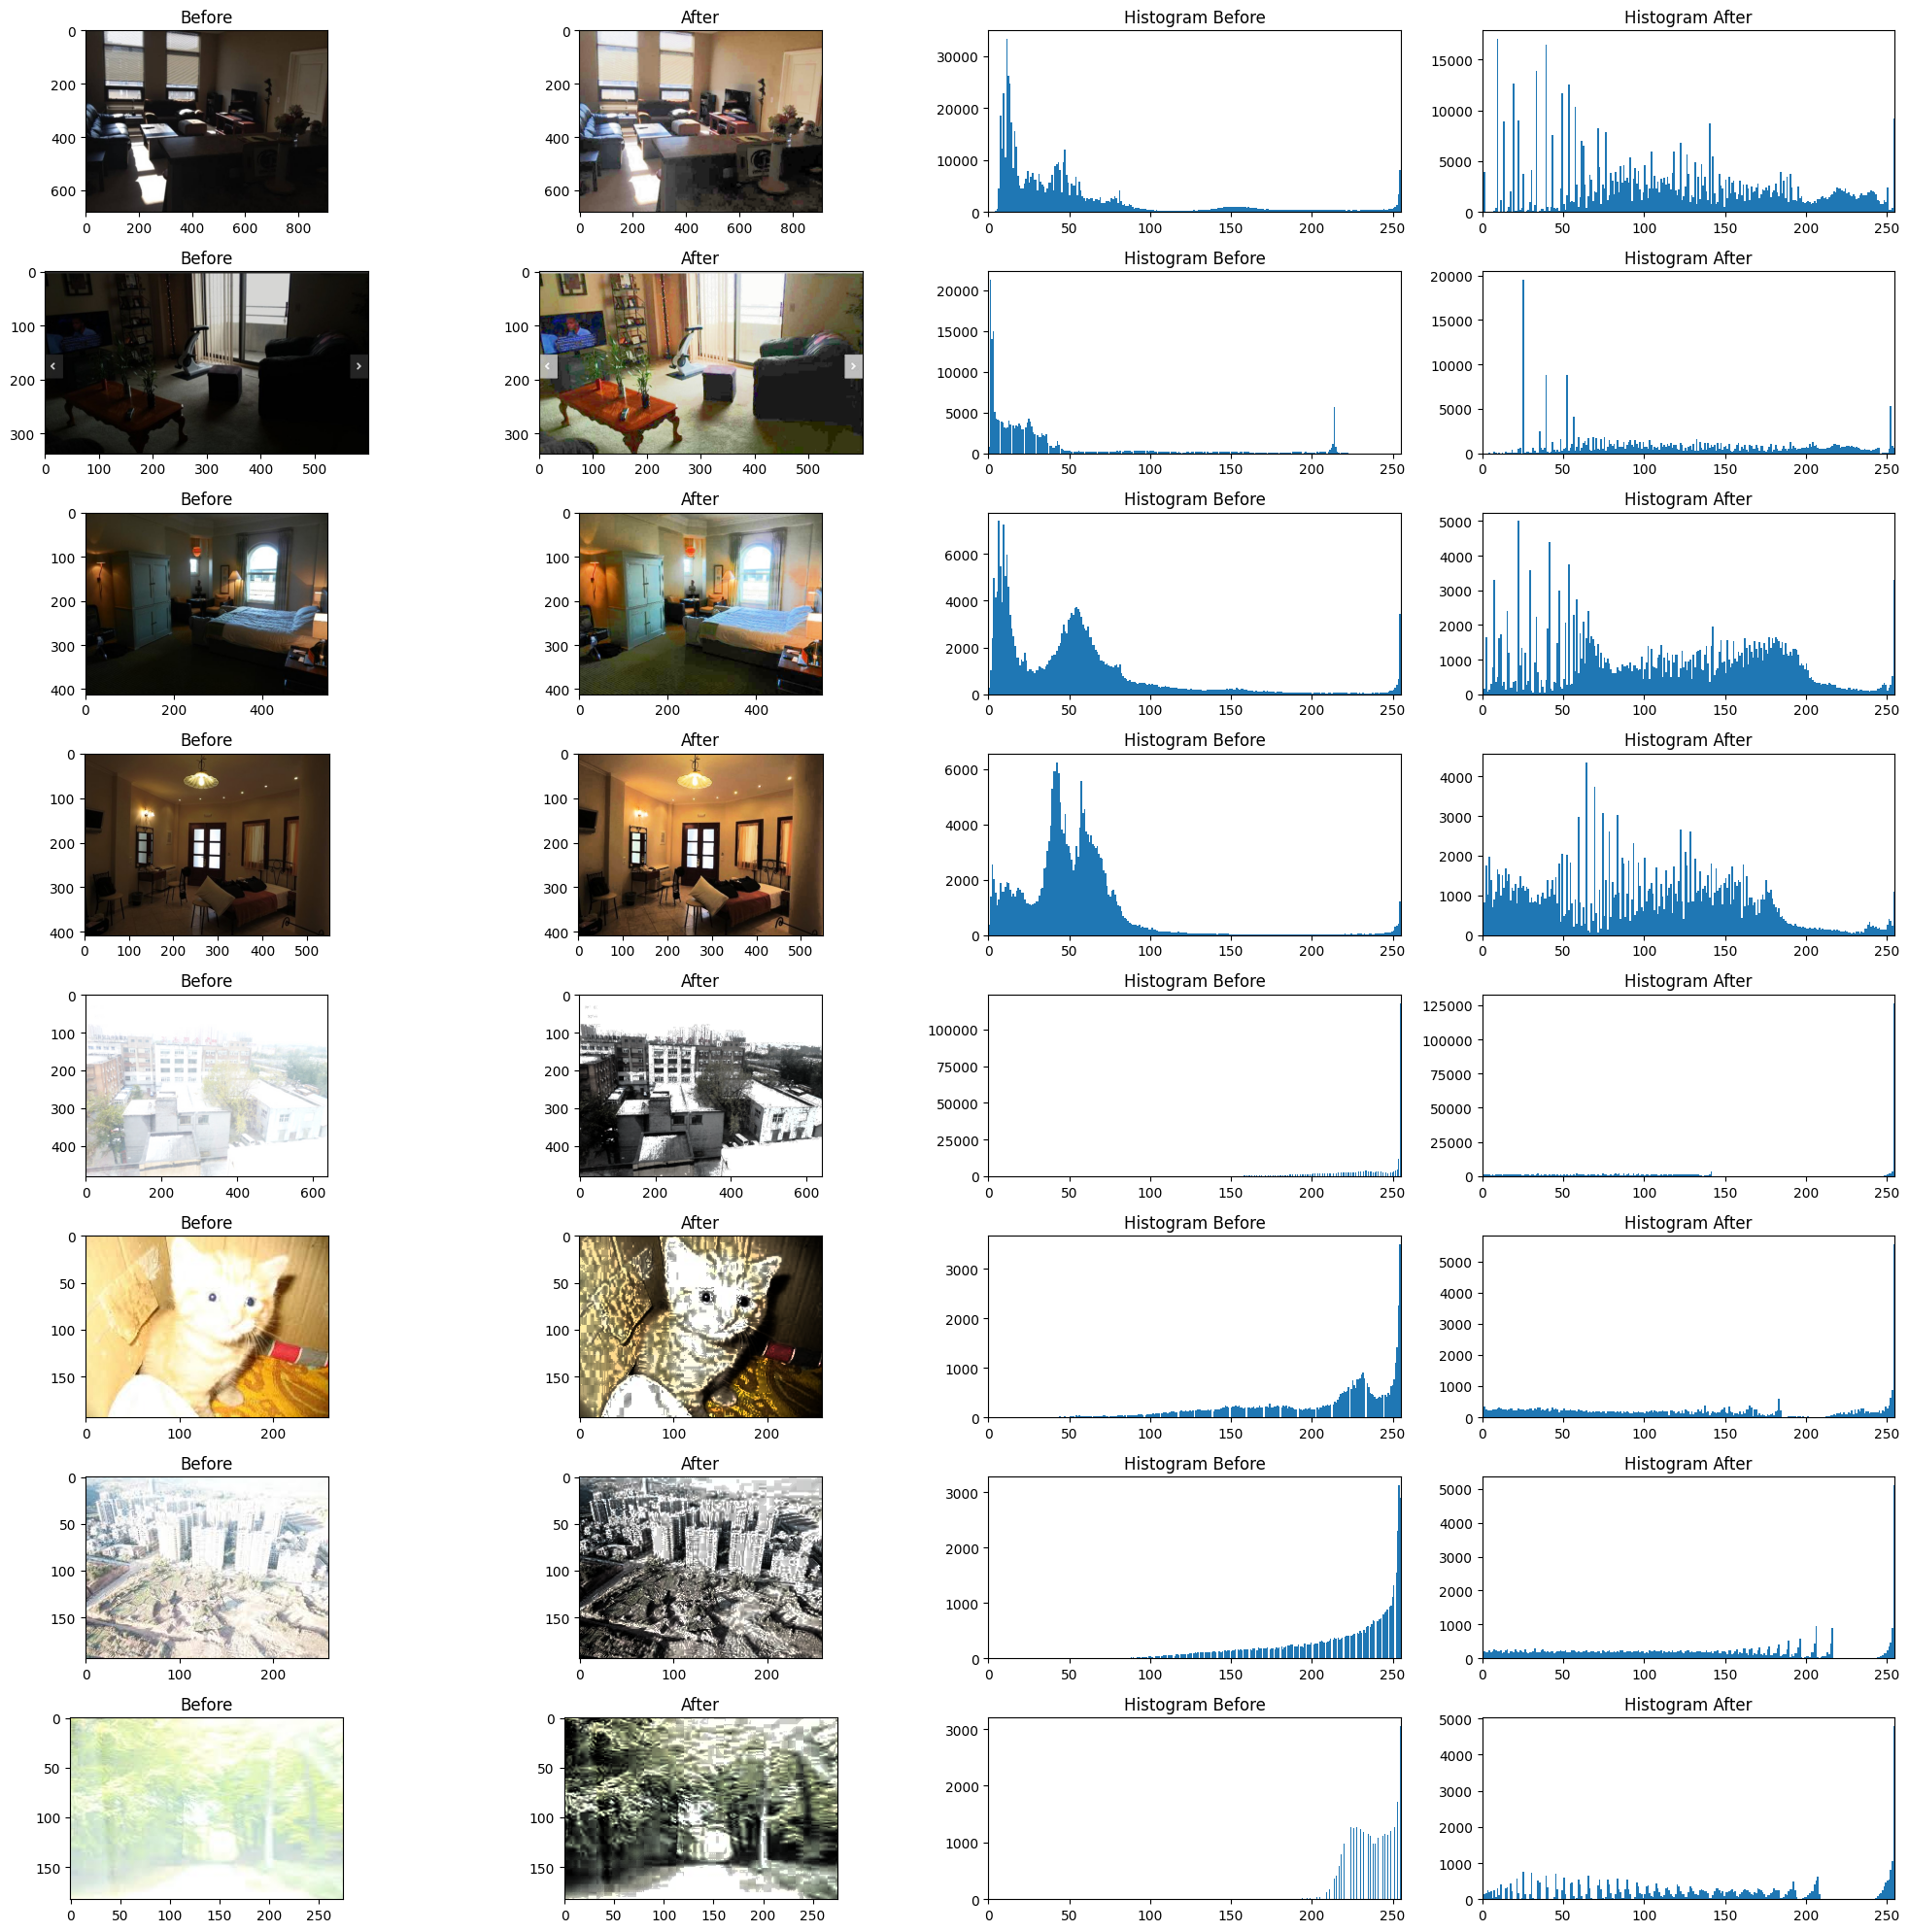

In [4]:
_, axes = plt.subplots(len_images, 4, figsize=(20, 20))
for i in range(len_images):
    image_path: str = os.path.join(SAMPLES_DIR, images[i])
    image: Image.Image = Image.open(image_path)                                                             # read the image from the given path
    image_HSV_before: npt.NDArray[np.uint8] = np.asarray(image.convert(PIL_MODE_HSV))                       # convert the image from RGB to HSV
    image_before_grayscale: npt.NDArray[np.uint8] = np.asarray(image_HSV_before)[:, :, 2]                   # get the V channel of the image
    image_after_grayscale: npt.NDArray[np.uint8] = histogram_equalization_grayscale(image_before_grayscale) # get the HE-ed V channel
    image_HSV_after: npt.NDArray[np.uint8] = image_HSV_before.copy()                                        # copy the original image
    image_HSV_after[:, :, 2] = image_after_grayscale                                                        # override the V chanel of the image
    image_before = color_space_convert(image_HSV_before, PIL_MODE_HSV, PIL_MODE_RGB)
    image_after = color_space_convert(image_HSV_after, PIL_MODE_HSV, PIL_MODE_RGB)                          # convert the image back to RGB
    show_image_gray(axes[i, 0], image_before, 'Before')
    show_image_gray(axes[i, 1], image_after, 'After')
    show_hist(axes[i, 2], color_space_convert(image_HSV_before, PIL_MODE_HSV, PIL_MODE_GRAY), 'Histogram Before')
    show_hist(axes[i, 3], color_space_convert(image_HSV_after, PIL_MODE_HSV, PIL_MODE_GRAY), 'Histogram After')
plt.tight_layout()
plt.show()

4. For each image, convert the color space of it from `RGB` to `YCbCr`, and treat channel `Y` as a grayscale image, run the process and reassemble the enhanced image.

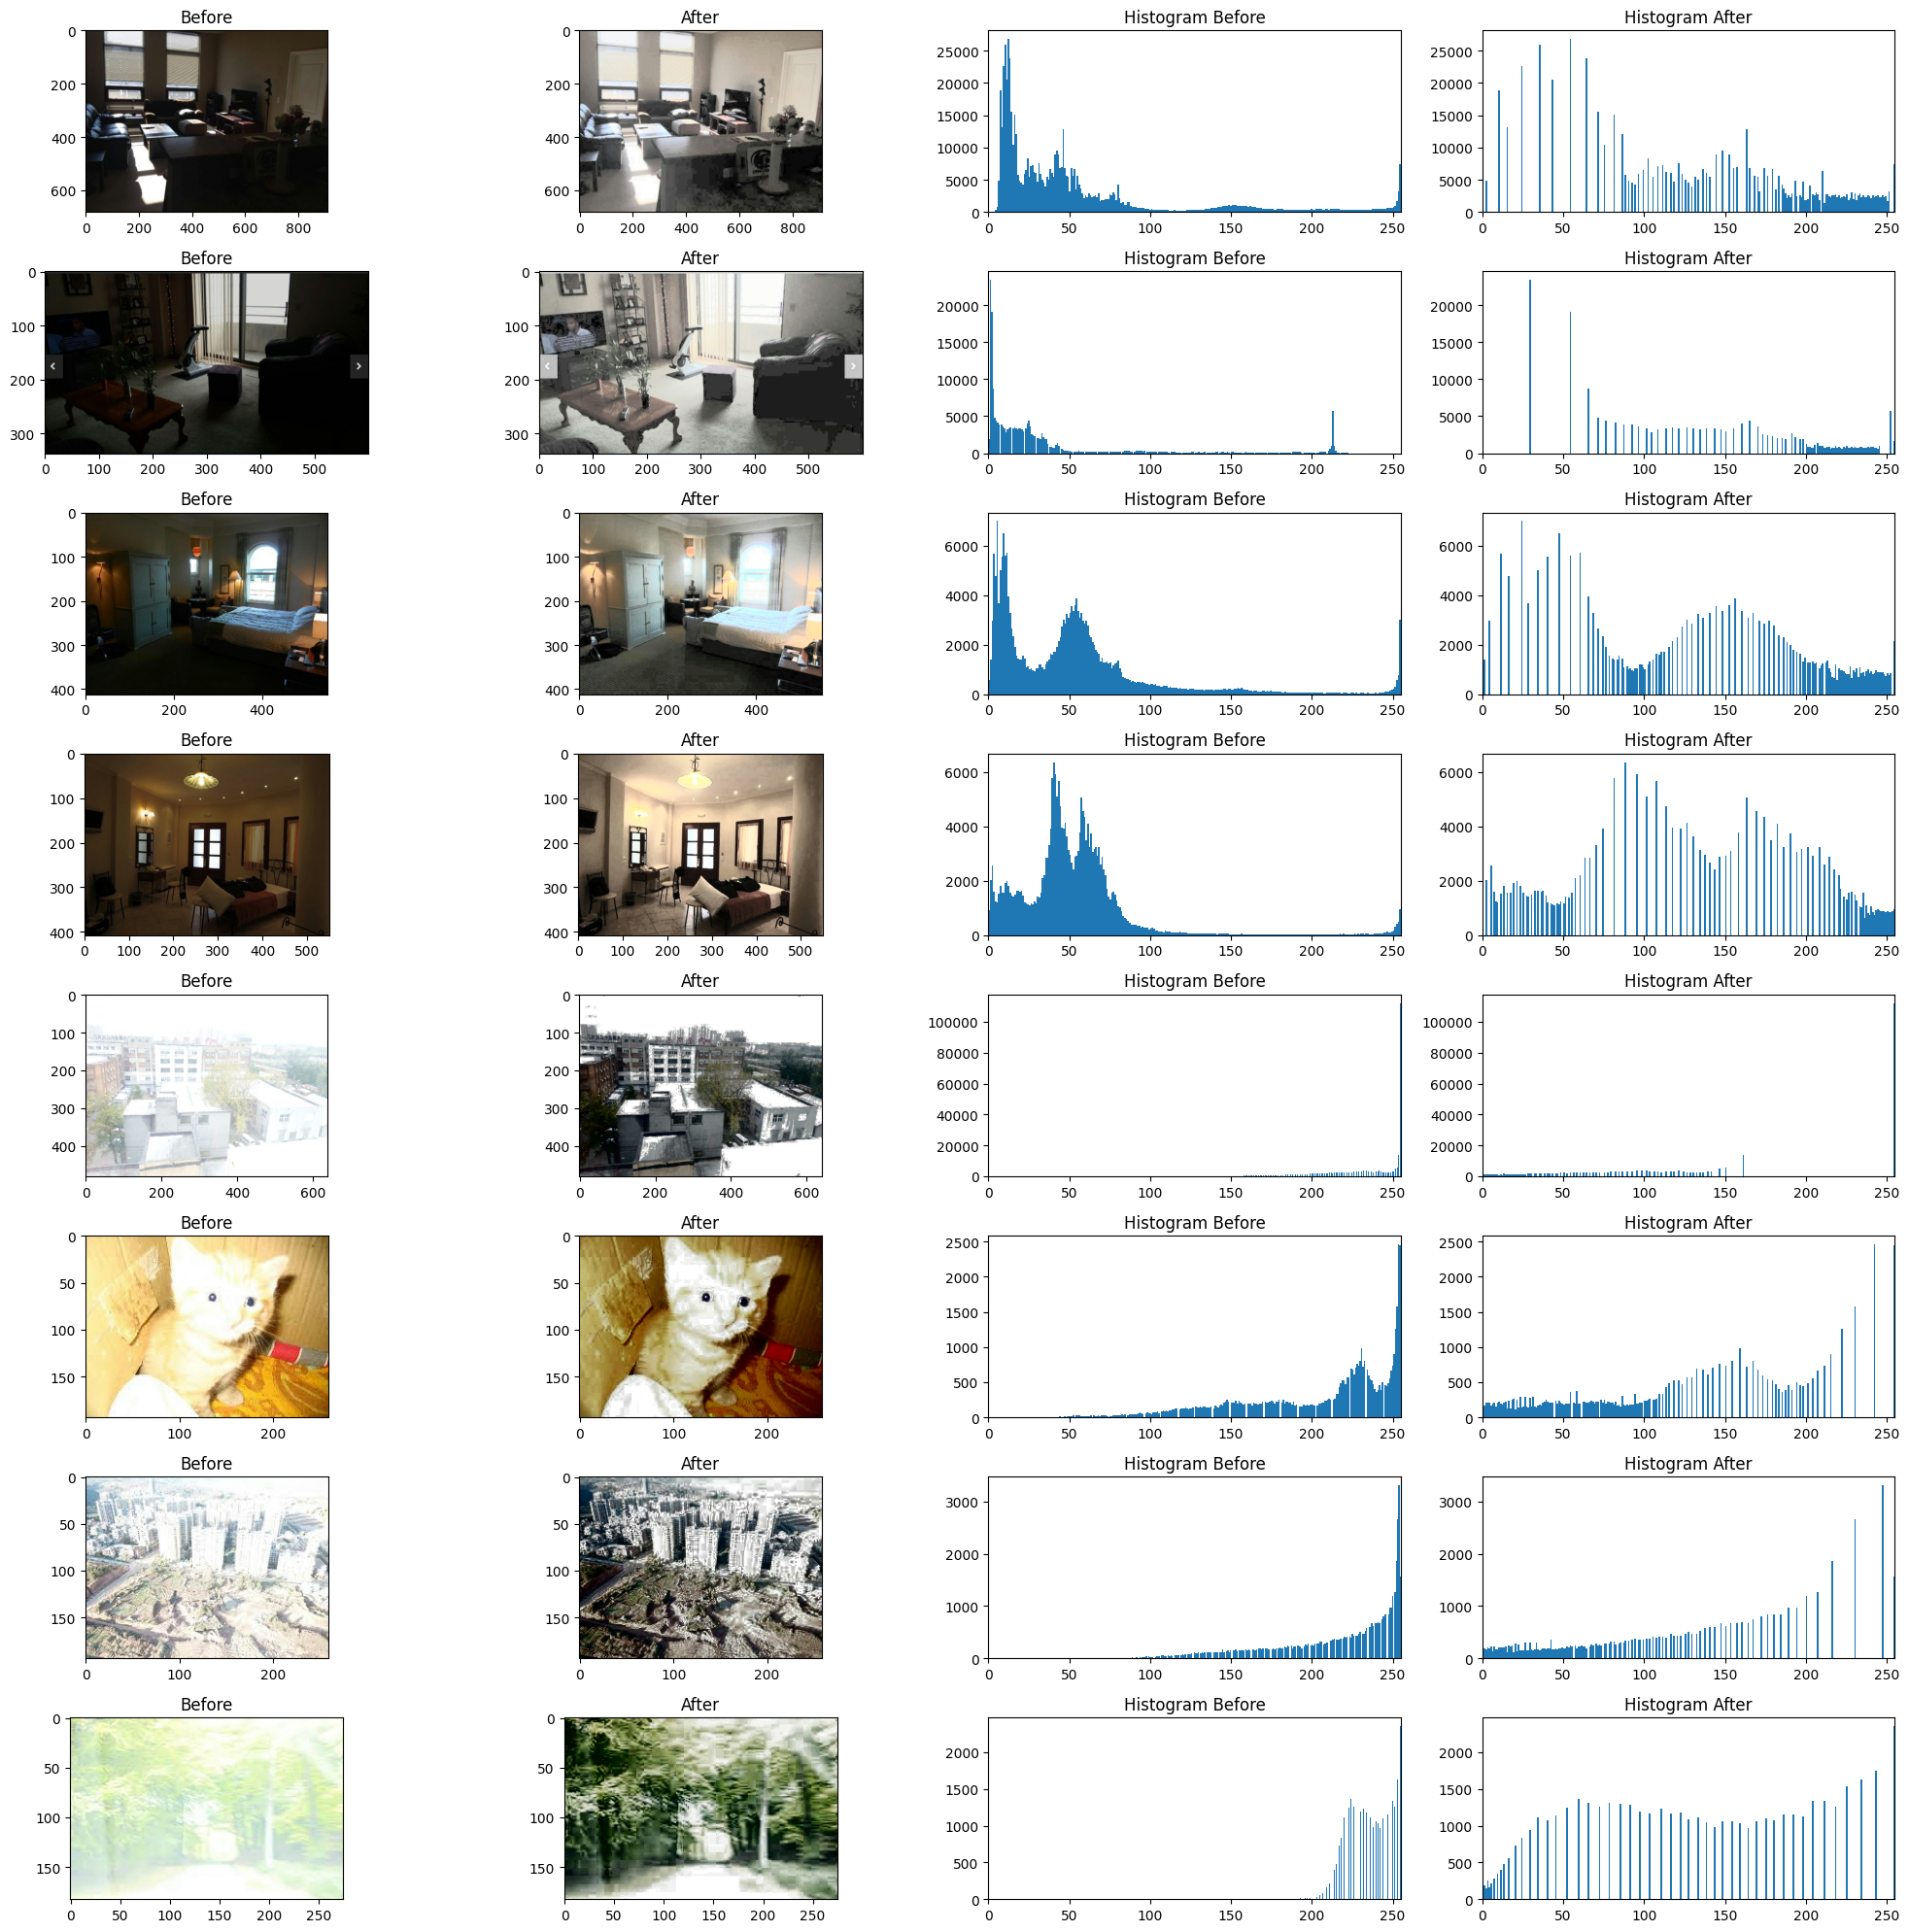

In [5]:
_, axes = plt.subplots(len_images, 4, figsize=(20, 20))
for i in range(len_images):
    image_path: str = os.path.join(SAMPLES_DIR, images[i])
    image: Image.Image = Image.open(image_path)                                                                 # read the image from the given path
    image_YCbCr_before: npt.NDArray[np.uint8] = np.asarray(image.convert(PIL_MODE_YCBCR))                       # convert the image from RGB to YCbCr
    image_before_grayscale: npt.NDArray[np.uint8] = np.asarray(image_YCbCr_before)[:, :, 0]                     # get the Y channel of the image
    image_after_grayscale: npt.NDArray[np.uint8] = histogram_equalization_grayscale(image_before_grayscale)     # get the HE-ed Y channel
    image_YCbCr_after: npt.NDArray[np.uint8] = image_YCbCr_before.copy()                                        # copy the original image
    image_YCbCr_after[:, :, 0] = image_after_grayscale                                                          # override the Y chanel of the image
    image_before = color_space_convert(image_YCbCr_before, PIL_MODE_YCBCR, PIL_MODE_RGB)
    image_after = color_space_convert(image_YCbCr_after, PIL_MODE_YCBCR, PIL_MODE_RGB)                          # convert the image back to RGB
    show_image_gray(axes[i, 0], image_before, 'Before')
    show_image_gray(axes[i, 1], image_after, 'After')
    show_hist(axes[i, 2], color_space_convert(image_YCbCr_before, PIL_MODE_YCBCR, PIL_MODE_GRAY), 'Histogram Before')
    show_hist(axes[i, 3], color_space_convert(image_YCbCr_after, PIL_MODE_YCBCR, PIL_MODE_GRAY), 'Histogram After')
plt.tight_layout()
plt.show()